✅ Model Loaded Successfully!


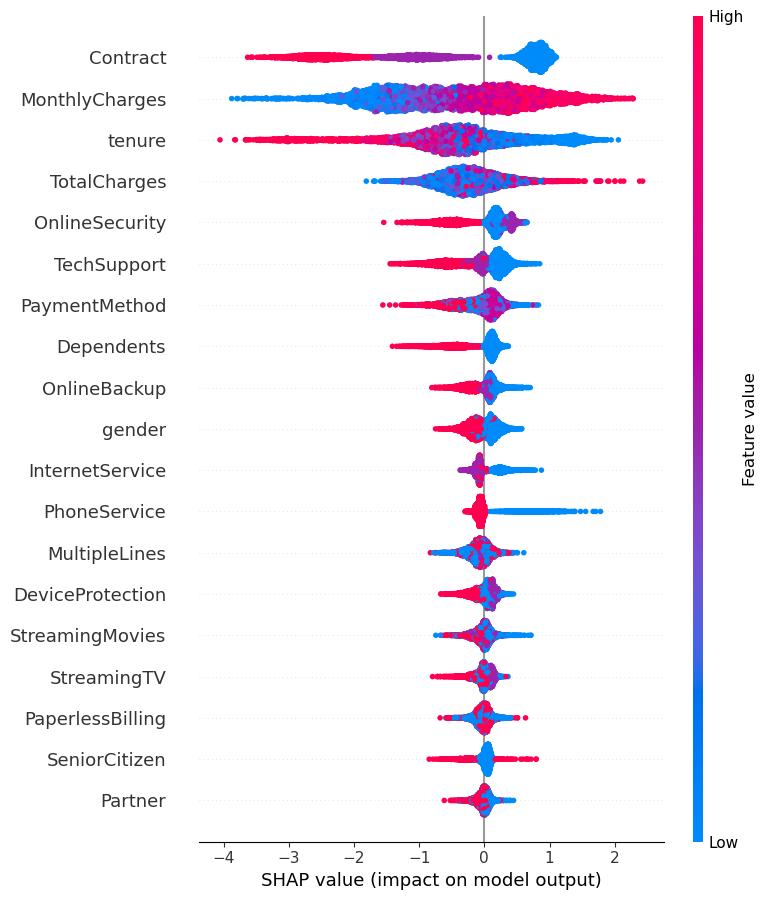

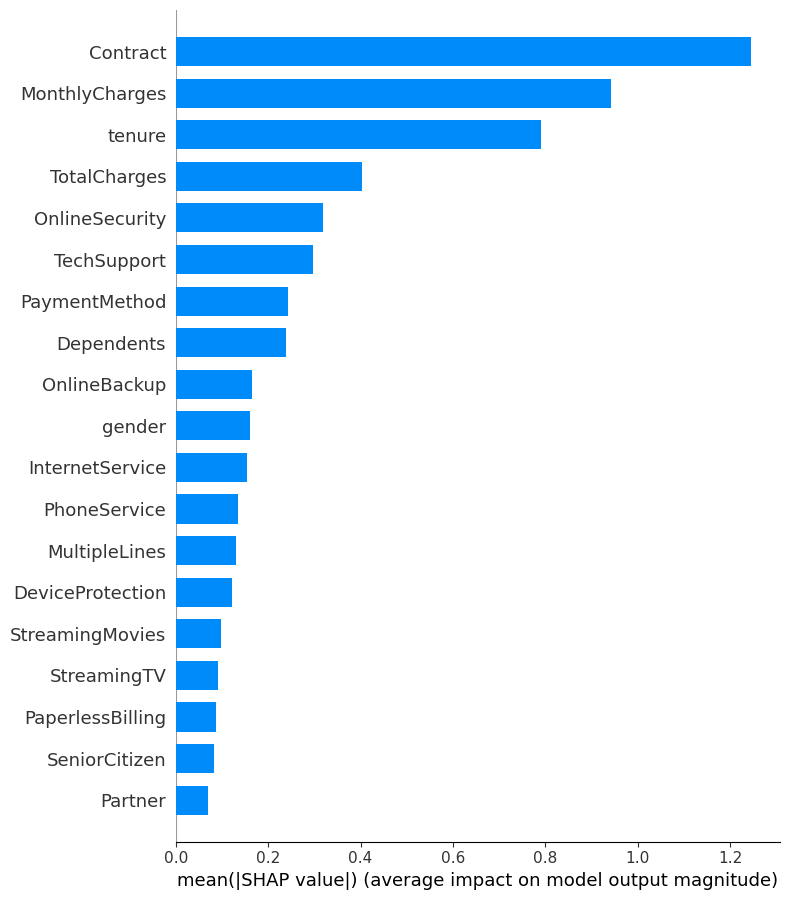

In [1]:
# 3_Model_Evaluation_Interpretability.ipynb

# 📌 Import Libraries
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import joblib

# 📌 Load Preprocessed Data (Optional, to match feature names)
df = pd.read_csv('D:/projects/Customer-Churn-Prediction/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 📌 Drop Irrelevant Column
df.drop(['customerID'], axis=1, inplace=True)

# 📌 Handle TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# 📌 Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder, StandardScaler
for col in df.select_dtypes(include=['object']).columns:
    if col != 'Churn':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# 📌 Feature Scaling
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# 📌 Prepare Features
X = df.drop('Churn', axis=1)
y = df['Churn']

# 📌 Load Saved Model
import xgboost as xgb
model = joblib.load('D:/projects/Customer-Churn-Prediction/deployment/churn_model.pkl')
print("✅ Model Loaded Successfully!")

# 📌 SHAP Explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# 📌 Summary Plot - Feature Importance
plt.title('SHAP Summary Plot')
shap.summary_plot(shap_values, X)

# 📌 Bar Plot - Mean Absolute SHAP Values
shap.summary_plot(shap_values, X, plot_type="bar")
